In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the Excel file
file_path = 'data.xlsx'
df = pd.read_excel(file_path)

df.head()

,F_0 = l,F_1 = t,r * F[n-1],s * F[n-2],Classification
0,0,1,1,2,1
1,0,1,1,3,1
2,1,2,1,3,0
3,0,1,1,2,1
4,0,1,1,3,1


   F_0 = l  F_1 = t  r * F[n-1]  s * F[n-2]  Classification
0        0        1           1           2               1
1        0        1           1           3               1
2        1        2           1           3               0
3        0        1           1           2               1
4        0        1           1           3               1
Accuracy: 0.93
Precision: 0.87
Recall: 0.93
F1 Score: 0.90


c:\Users\EG\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


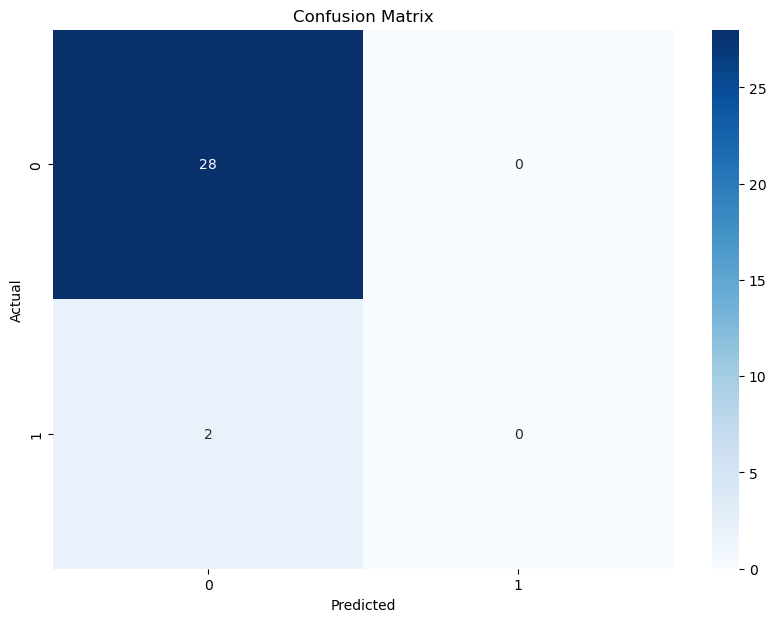


Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       0.00      0.00      0.00         2

    accuracy                           0.93        30
   macro avg       0.47      0.50      0.48        30
weighted avg       0.87      0.93      0.90        30



c:\Users\EG\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\EG\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\EG\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Separate features (X) and target (y)
X = df.drop(columns=['Classification'])  # Replace 'classification' with the exact name of your target column if needed
y = df['Classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Adjust the 'average' argument as needed
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [19]:
! pip install imbalanced-learn


New class distribution:
 Classification
0    141
1    141
Name: count, dtype: int64


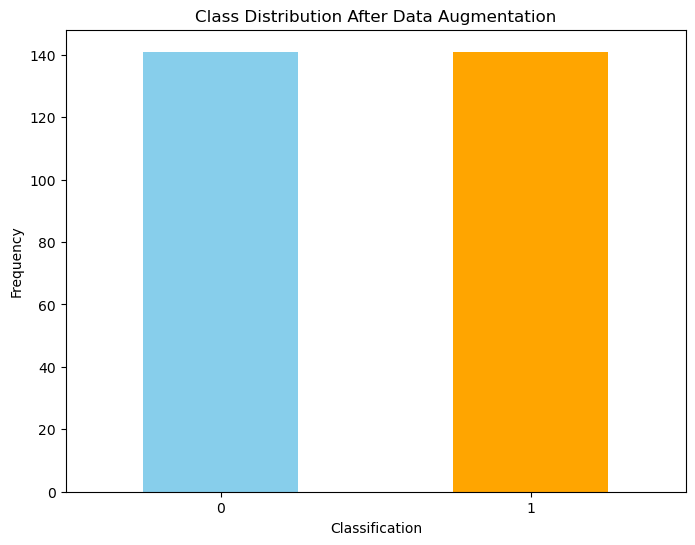

In [20]:
from sklearn.utils import resample


# Separate majority and minority classes
df_majority = df[df['Classification'] == 0]
df_minority = df[df['Classification'] == 1]

# Oversample the minority class
df_minority_upsampled = resample(
    df_minority,
    replace=True,  # Sample with replacement
    n_samples=len(df_majority),  # Match the majority class size
    random_state=42  # For reproducibility
)

# Combine majority and upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the new distribution
print("New class distribution:\n", df_balanced['Classification'].value_counts())

# Plot the histogram of the class distribution
plt.figure(figsize=(8, 6))
df_balanced['Classification'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution After Data Augmentation')
plt.xlabel('Classification')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97


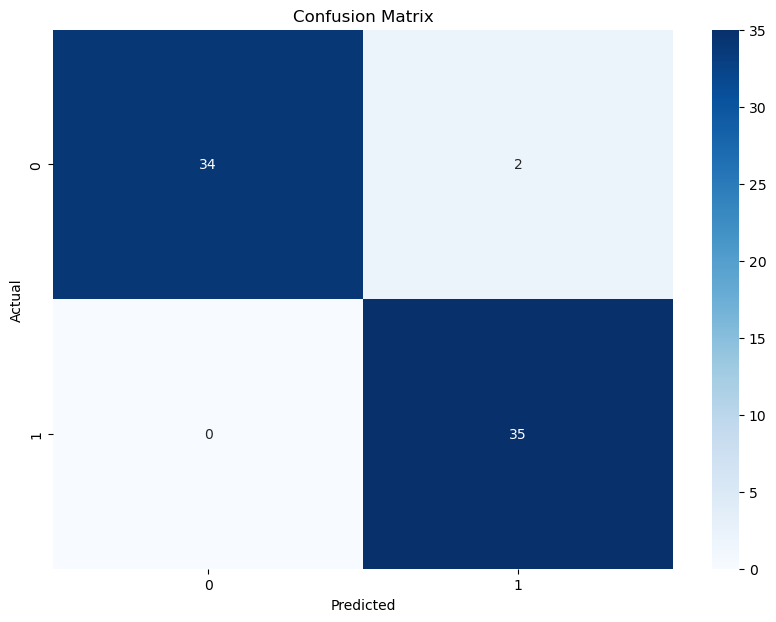


Classification Report:


In [27]:
# Separate features (X) and target (y)
X = df_balanced.drop(columns=['Classification'])  # Replace 'classification' with the exact name of your target column if needed
y = df_balanced['Classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Adjust the 'average' argument as needed
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:")

In [31]:
print(df_balanced.columns)


Index(['F_0 = l', 'F_1 = t', 'r * F[n-1]', 's * F[n-2]', 'Classification'], dtype='object')


New class distribution:
 Classification
0    141
1    141
Name: count, dtype: int64

Normalized Dataset:
     F_0 = l   F_1 = t  r * F[n-1]  s * F[n-2]  Classification
0  0.666667  0.571429         0.5    0.272727               0
1  0.566667  0.190476         0.0    0.045455               0
2  0.000000  0.000000         0.0    0.090909               1
3  0.200000  0.380952         0.4    0.772727               0
4  0.000000  0.000000         0.0    0.090909               1

Model Evaluation Metrics:
Accuracy: 0.97
Precision: 0.95
Recall: 1.00
F1 Score: 0.97


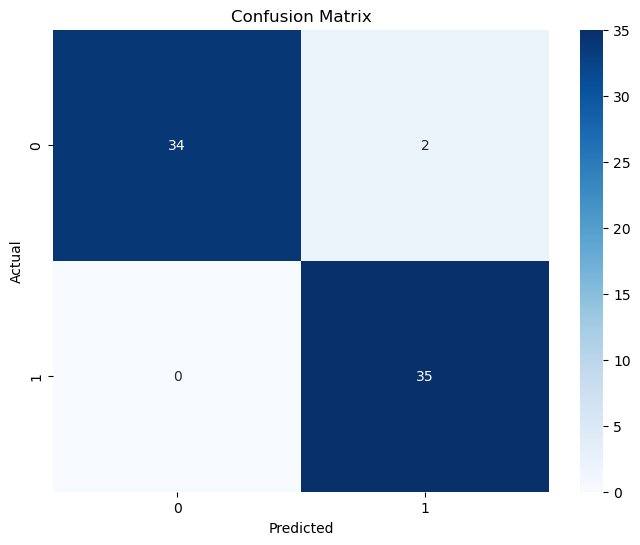


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        36
           1       0.95      1.00      0.97        35

    accuracy                           0.97        71
   macro avg       0.97      0.97      0.97        71
weighted avg       0.97      0.97      0.97        71



In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample

# Normalize the selected features
scaler = MinMaxScaler()
features_to_normalize = ['F_0 = l', 'F_1 = t', 'r * F[n-1]', 's * F[n-2]']
df_balanced[features_to_normalize] = scaler.fit_transform(df_balanced[features_to_normalize])

# Display the new class distribution and normalized data
print("New class distribution:\n", df_balanced['Classification'].value_counts())
print("\nNormalized Dataset:\n", df_balanced.head())

# Split features and target
X = df_balanced[features_to_normalize]
y = df_balanced['Classification']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the RandomForestClassifier
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
